In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy.optimize import linprog
%matplotlib inline
rcParams["figure.figsize"]=(18,5)

# Task 1. Approximating the number of workers needed

In [17]:
# Planing horizon
h = 12

# forecasts for a year from HW №2
forecast = np.array([297.20766224157813, 300.69163028120994, 282.51326873326303, 257.783521578908, 250.26309804642202, 240.1651449636221,
     247.47719728291037, 238.53373182845115, 233.52362023317815, 244.53669488012792, 256.05582680642607, 272.0632615669966])

# calculating the forecasted number of employees needed each month
forecast_employees = np.ceil(forecast/2)

x0 = [0 for i in range(h)]


Text(0.5, 0, 'Month')

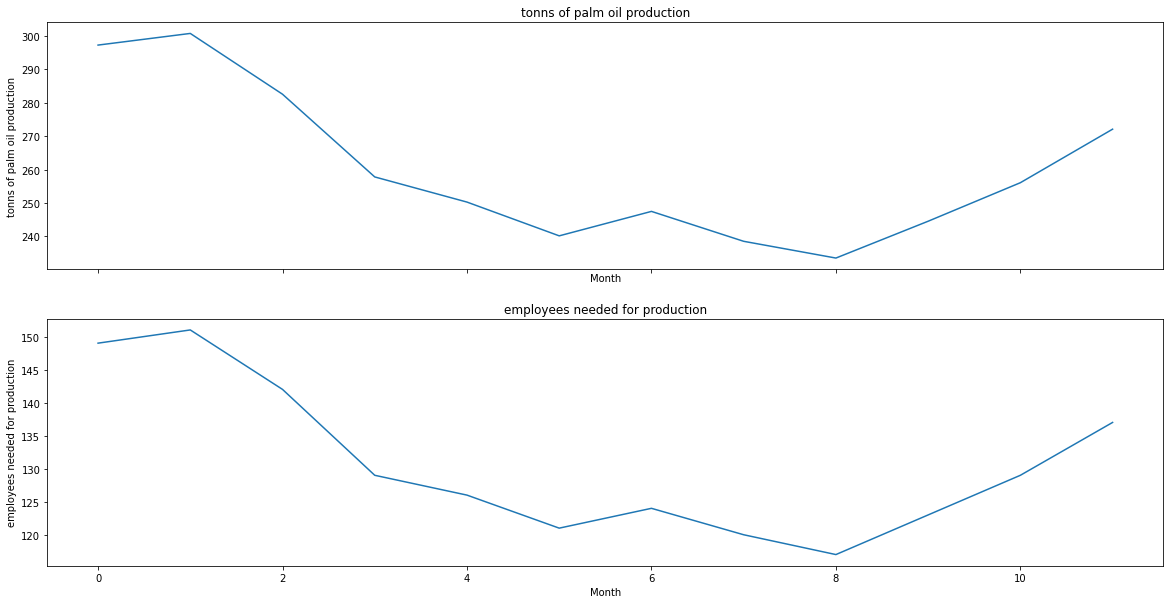

In [18]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10), sharex=True)
ax1.plot(forecast)
ax1.set_ylabel("tonns of palm oil production")
ax1.set_title("tonns of palm oil production")
ax1.set_xlabel("Month")
ax2.plot(forecast_employees)
ax2.set_ylabel("employees needed for production")
ax2.set_title("employees needed for production")
ax2.set_xlabel("Month")
# plt.plot(forecast)

In [19]:

# employee information
employee = [3, 4, 5, 7]

# Costs of employing each employee from employee array
costs = [3300, 4040, 5200, 7440]


In [20]:
# Objective function
vec_min = np.array([i for i in costs for _ in range(h)])
vec_min

array([3300, 3300, 3300, 3300, 3300, 3300, 3300, 3300, 3300, 3300, 3300,
       3300, 4040, 4040, 4040, 4040, 4040, 4040, 4040, 4040, 4040, 4040,
       4040, 4040, 5200, 5200, 5200, 5200, 5200, 5200, 5200, 5200, 5200,
       5200, 5200, 5200, 7440, 7440, 7440, 7440, 7440, 7440, 7440, 7440,
       7440, 7440, 7440, 7440])

In [21]:
# Constraint matrix rows: h (1 year in our case), cols: len(avail_auto) * h (4 * 1 year)
A_full = np.empty((h, h * len(employee)), dtype=np.int64)
for n, m in enumerate(employee):
    A_temp = np.zeros((h, h), dtype=np.int64)
    for i in range(h):
        for j in range(max(0, i-m+1), min(i+1, h)):
            A_temp[i, j] = 1
    A_full[:, h * n: h * (n+1)] = A_temp
A_con = A_full[:h, :]


In [69]:
#### Optimizer
c = vec_min
b = np.array(x0) - np.array(forecast_employees)
A = - A_con

res = linprog(c, A, b, method='revised simplex')
print(res)

           con: array([], dtype=float64)
 crossover_nit: 0
         eqlin:  marginals: array([], dtype=float64)
  residual: array([], dtype=float64)
           fun: 1629480.0
       ineqlin:  marginals: array([-1160., -2140.,    -0.,  -740., -1160.,  -320., -1820.,  -740.,
        -740.,    -0.,    -0., -3300.])
  residual: array([ 0.,  0.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  8.,  0.])
         lower:  marginals: <MemoryView of 'ndarray' at 0x2cfe3bc7a00>
  residual: array([ 26.,   0.,   0.,   0.,   0.,   0.,   3.,   0.,   0.,  23.,   0.,
         0., 120.,   2.,   0.,   4., 117.,   0.,   0.,   0., 114.,   0.,
         0.,   0.,   3.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.])
       message: 'Optimization terminated successfully.'
           nit: 12
         slack: array([ 0.,  0.,  9.,  0.,  0.,  0.,  0.,  0.,  0., 14.,  8.,  0.])
        status: 0
       success: True
 

In [31]:
opt = np.asmatrix(np.ceil(res.x))
plan = opt.reshape((len(employee), -1)).transpose()
result = np.asmatrix(A_con) * np.asmatrix(opt).transpose() + np.asmatrix(x0).transpose()
print(plan)
print(result)

[[ 22. 124.   3.   0.]
 [  0.   2.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  4. 117.   0.   0.]
 [  0.   0.   0.   0.]
 [  3.   0.   0.   0.]
 [  0.   0.   0.   0.]
 [  0. 114.   0.   0.]
 [  9.   0.   0.   0.]
 [  6.   0.   0.   0.]
 [  8.   0.   0.   0.]]
[[149.]
 [151.]
 [151.]
 [129.]
 [126.]
 [121.]
 [124.]
 [120.]
 [117.]
 [123.]
 [129.]
 [137.]]


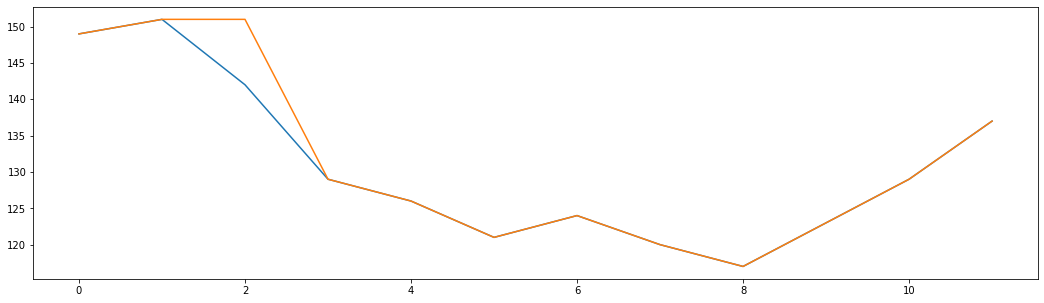

In [32]:
plt.plot(forecast_employees)
plt.plot(result)

### Let's calculate the total amount spent on employees in the next year

In [67]:
sum_eployees = np.array(plan.sum(axis=0)).reshape((4,))
costs = np.array(costs)

total_sum = (sum_eployees * costs).sum()

print(f"total cost of all employees: {total_sum}$")

total cost of all employees: 1629480.0$


### Conclusion

This is the optimal solution considering that we have no workers that are working at the beginning of the year. We should take these workers into account in the future estimations.